In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
params = {'legend.fontsize': 'medium',
          'figure.figsize': (8, 5),
         'axes.labelsize': 'medium',
         'axes.titlesize':'medium',
         'xtick.labelsize':'small',
         'ytick.labelsize':'small'}
plt.rcParams.update(params)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('2020_US_Region_Mobility_Report.csv')
df_us = pd.read_csv('us.csv')

In [3]:
us = df[df['sub_region_1'].isna()]

In [4]:
us.shape

(218, 14)

In [5]:
us = us.drop(['country_region_code', 'country_region', 'sub_region_1', 
                   'sub_region_2', 'metro_area', 'iso_3166_2_code', 'census_fips_code'], axis = 1)

In [6]:
us.set_index('date', inplace = True)
df_us.set_index('date', inplace = True)

In [7]:
df_us['case_day'] = df_us['cases'].diff()
df_us['case_day'][0] = 1
df_us['case_day'] =  df_us['case_day'].astype('int')

In [8]:
merged = df_us.join(us, how='inner')

In [9]:
merged

,cases,deaths,case_day,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
date,,,,,,,,,
2020-02-15,15,0,0,6.0,2.0,15.0,3.0,2.0,-1.0
2020-02-16,15,0,0,7.0,1.0,16.0,2.0,0.0,-1.0
2020-02-17,25,0,10,6.0,0.0,28.0,-9.0,-24.0,5.0
2020-02-18,25,0,0,0.0,-1.0,6.0,1.0,0.0,1.0
2020-02-19,25,0,0,2.0,0.0,8.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
2020-09-15,6614112,195683,39221,NaN,NaN,NaN,NaN,-34.0,9.0
2020-09-16,6653328,196680,39216,NaN,NaN,NaN,NaN,-34.0,9.0
2020-09-17,6698641,197529,45313,NaN,NaN,NaN,NaN,-34.0,9.0


In [10]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 218 entries, 2020-02-15 to 2020-09-19
Data columns (total 9 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   cases                                               218 non-null    int64  
 1   deaths                                              218 non-null    int64  
 2   case_day                                            218 non-null    int32  
 3   retail_and_recreation_percent_change_from_baseline  184 non-null    float64
 4   grocery_and_pharmacy_percent_change_from_baseline   184 non-null    float64
 5   parks_percent_change_from_baseline                  184 non-null    float64
 6   transit_stations_percent_change_from_baseline       184 non-null    float64
 7   workplaces_percent_change_from_baseline             218 non-null    float64
 8   residential_percent_change_from_baseline            218 non-null    fl

<AxesSubplot:xlabel='date'>

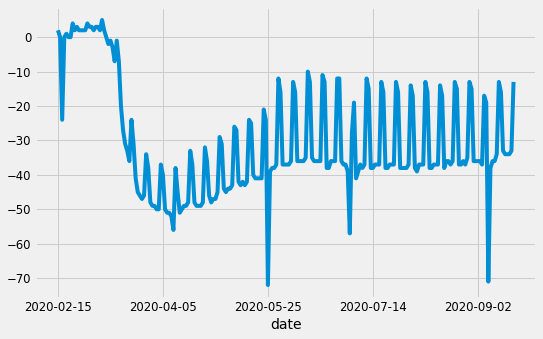

In [11]:
merged['workplaces_percent_change_from_baseline'].plot()

In [12]:
workplace = merged[['case_day', 'workplaces_percent_change_from_baseline']]

In [13]:
workplace.tail()

,case_day,workplaces_percent_change_from_baseline
date,,
2020-09-15,39221,-34.0
2020-09-16,39216,-34.0
2020-09-17,45313,-34.0
2020-09-18,48875,-33.0
2020-09-19,41844,-13.0


In [14]:
workplace.info()

<class 'pandas.core.frame.DataFrame'>
Index: 218 entries, 2020-02-15 to 2020-09-19
Data columns (total 2 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   case_day                                 218 non-null    int32  
 1   workplaces_percent_change_from_baseline  218 non-null    float64
dtypes: float64(1), int32(1)
memory usage: 4.3+ KB
